In [4]:
pip install photutils

  Obtaining dependency information for photutils from https://files.pythonhosted.org/packages/50/33/a194339c2c66f87e5d225d9c34d85f93d7ec052a6629956a4a8fe3ee53f9/photutils-1.9.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.5/653.5 kB 6.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import astropy.io.fits as fits
from astropy import stats
import glob
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import aperture_photometry
from photutils import CircularAperture, CircularAnnulus

/var/folders/w4/stsldttd6bz33gnft7k3hv2c0000gn/T/ipykernel_3196/3767078723.py:7: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder
/var/folders/w4/stsldttd6bz33gnft7k3hv2c0000gn/T/ipykernel_3196/3767078723.py:8: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import aperture_photometry
/var/folders/w4/stsldttd6bz33gnft7k3hv2c0000gn/T/ipykernel_3196/3767078723.py:9: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.ape

In [16]:
img = fits.getdata('/Users/seiji/Desktop/astro/30_astr/res/20230823/M57-002/fn/fn_B.fit')
mean, median, std = sigma_clipped_stats(img, sigma=3.0)

daofind = DAOStarFinder(fwhm=3.0, threshold=5.0*std)  
sources = daofind(img) 
print(sources)

 id     xcentroid      ...        flux                 mag         
--- ------------------ ... ------------------ ---------------------
  1 1606.0274503081698 ... 1.6386370947542597   -0.5362069550108942
  2  3043.945182044709 ... 1.5161198863642003   -0.4518338606408593
  3  519.9268200275054 ... 1.5744646557567676   -0.4928322896430754
  4  743.0989997023892 ...  1.816708408840304   -0.6482130659393381
  5  630.9422187525637 ... 1.0289999715337577 -0.031038406870289956
  6 330.05947724152804 ...  1.450831705213225   -0.4040425942641987
  7   1269.39778976723 ...  3.453831806352823   -1.3457529615156245
  8 1105.2831029130214 ... 2.0839311781660164   -0.7972084307190658
  9  663.0620386657215 ...  1.759321099087647   -0.6133627777728017
 10 1922.0746156312132 ... 1.4691411066873616   -0.4176587762568112
...                ... ...                ...                   ...
 80 3010.9645995469577 ...  2.204023070577374   -0.8580403404357667
 81  662.8010360363512 ...  1.118536039849096  -

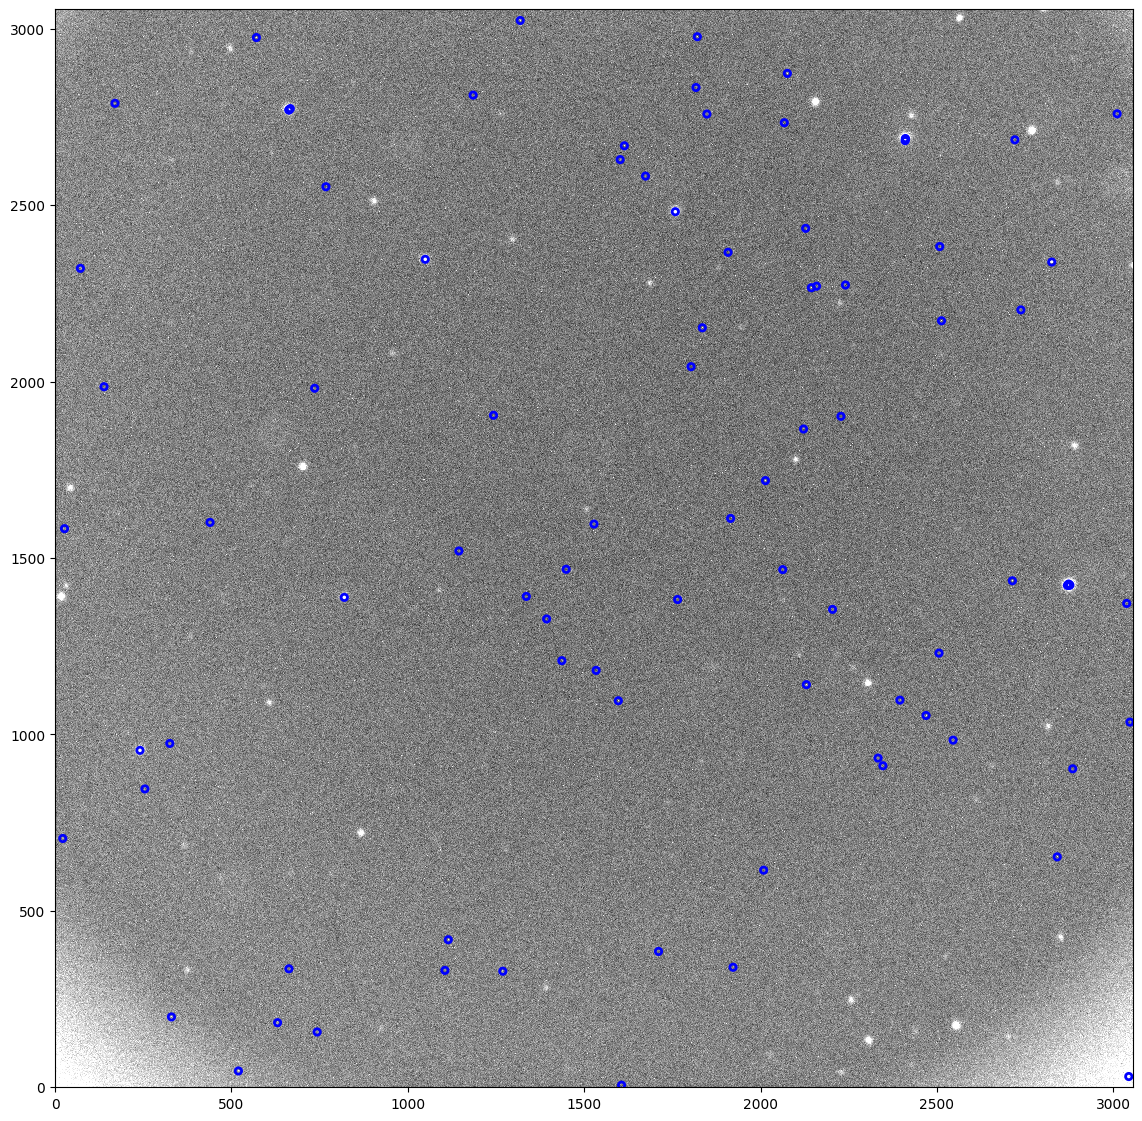

In [18]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=9.)
plt.figure(figsize=(14, 14))
plt.imshow(img, plt.cm.gray, vmin=median - 5*std, vmax = median + 5*std, origin='lower', interpolation='none')
apertures.plot(color='blue', lw=2.0, alpha=1.0)

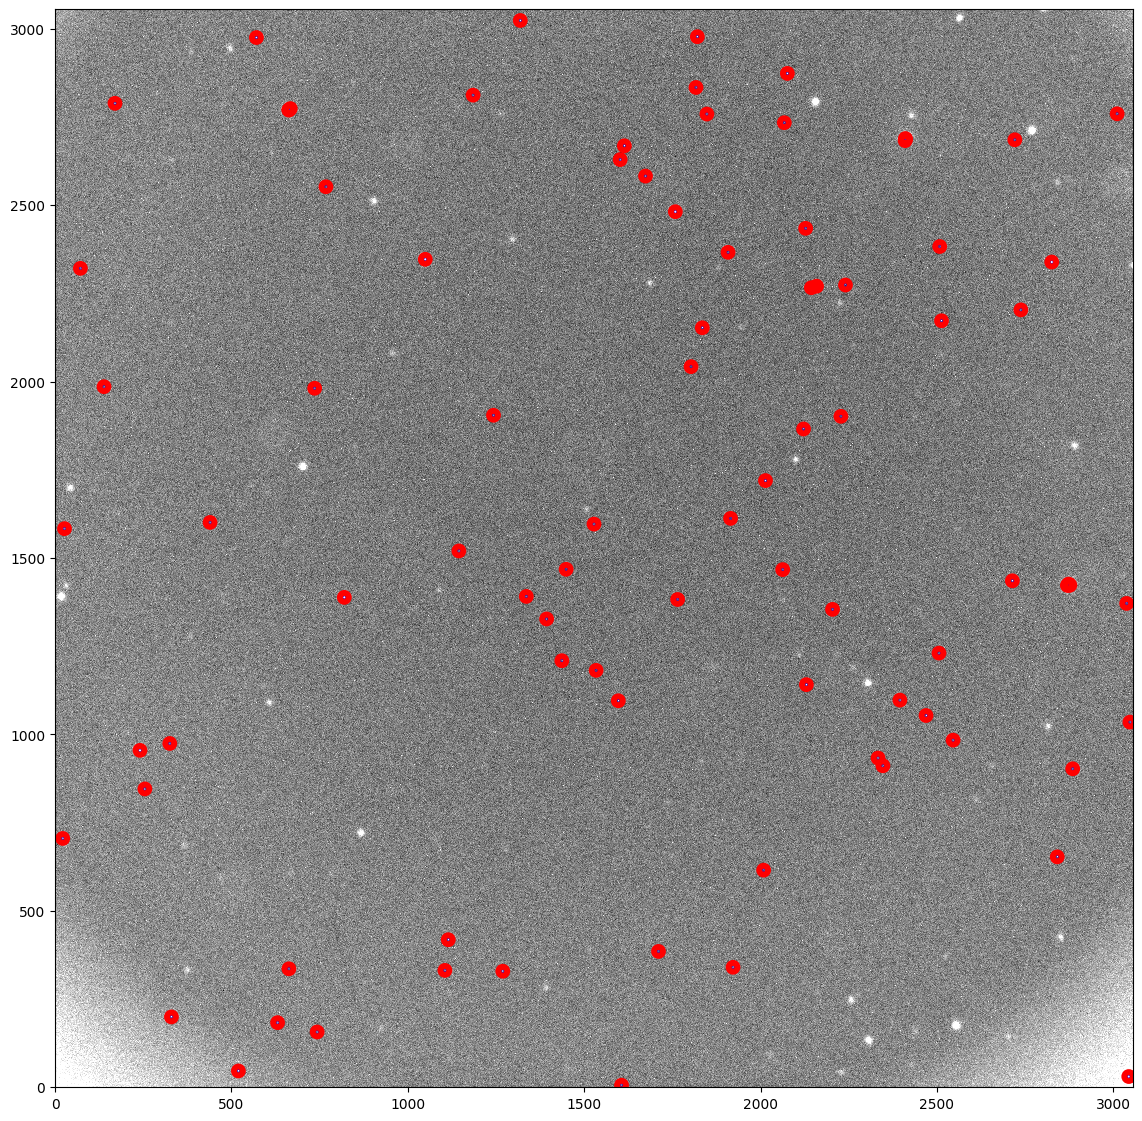

In [20]:
# 開口の半径はさっき定義したんだけど、わかりやすさのためにここでもっかいとりあえず定義しなおします。
apertures = CircularAperture(positions, r=9.)

#各星の周りの局所的な背景を測定する。各星を中心とした輪っかを作成。
annulus_apertures = CircularAnnulus(positions, r_in=10., r_out=15.)

# どうなってるか見てみましょう
plt.figure(figsize=(14, 14))
plt.imshow(img, plt.cm.gray, vmin=median - 5*std, vmax=median + 5*std, origin='lower', interpolation='none')
apertures.plot(color='blue', lw=3)
annulus_apertures.plot(color='red', lw=3)
#plt.xlim(550, 750)
#plt.ylim(100, 300)
#plt.xlim(400, 600)
#plt.ylim(400, 600)

In [21]:
annulus_masks = annulus_apertures.to_mask(method='center')
bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(img)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

#print(bkg_median)
bkg_median = np.array(bkg_median)
#print(bkg_median)

rawflux['annulus_median'] = bkg_median
print(rawflux['annulus_median'])
#print(rawflux)

NameError: name 'rawflux' is not defined